In [1]:
import numpy as np

import scipy.io.wavfile as wavfile
from scipy import signal

import time
import os

import ffmpeg

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

import glob

## Initialization
import IPython.display as ipd
import librosa.display

In [2]:
def plot_waveform(data, start, end):
    '''
    Signal Visualization
    
    Parameters:
    data (nd.array): the data we want to visualize
    start (int): start range
    end (int): end range

    Returns:
    None: just shows the graph  
    
    '''
    data = data[start:end]
    plt.plot(data)
    plt.ylabel('amplitude')
    plt.xlabel('samples')
    plt.show()
    return None

In [3]:
# def triangle(length, amplitude):
#     '''
#     Generate periodic triangular signals
    
#     Parameters:
#         length (int) - the length of output signal
#         amplitude (int or float in general) - amplitude of output signal
        
#     Returns:
#         list (of floats) - triangular signal
#     '''
#     section = length // 4
#     for direction in (1, -1):
#         for i in range(section):
#             yield i * (amplitude / section) * direction
#         for i in range(section):
#             yield (amplitude - (i * (amplitude / section))) * direction

In [4]:
sampling_rate = 16000 # 8000 hz  F_s
omega = np.pi / 10 # radians per sample (pysical_frequency = sampling_rate * omega / (2*np.pi))
amplitude = 1000
N = 3 * sampling_rate # lenght of signal

In [5]:
coef_no = int(N / 2) + 1 # amount of independent coefficients
samples = np.array(list(range(N))) # sample indices 
freqs = np.array(list(range(coef_no))) * sampling_rate / N # frequencies of current signal spectrum

In [6]:
t = np.linspace(0, N, N)
triangle_sample = signal.sawtooth(omega * t , 0.5)
# triangle_sample = triangle_sample.astype('int16')

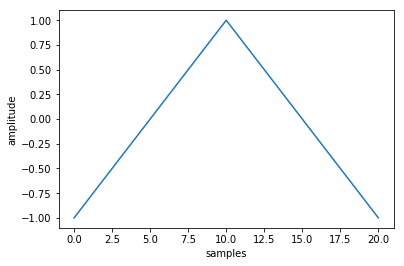

In [7]:
plot_waveform(triangle_sample, 0, 21)

In [8]:
ipd.Audio(triangle_sample, rate=sampling_rate)

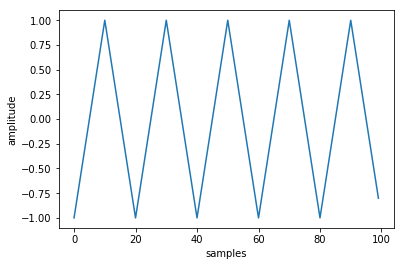

In [9]:
plot_waveform(triangle_sample, 0, 100)

In [10]:
coefs_sinusoid = np.fft.rfft(triangle_sample) # DFT coefs for 0, 1, ..., floor(N/2) base vectors
amplitude_spectr = np.abs(coefs_sinusoid)
db_spectr = 10*np.log10(amplitude_spectr + 1)

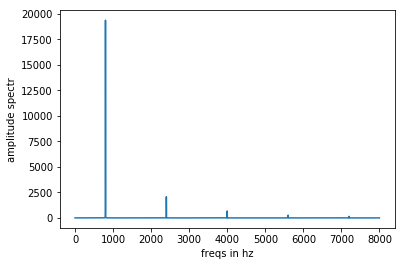

In [11]:
plt.plot(freqs, amplitude_spectr)
plt.xlabel('freqs in hz')
plt.ylabel('amplitude spectr')
plt.show()

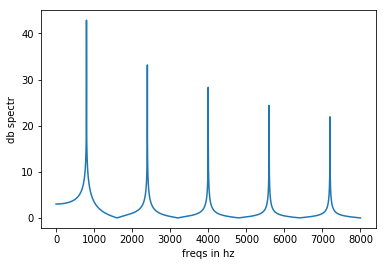

In [12]:
plt.plot(freqs, db_spectr)
plt.xlabel('freqs in hz')
plt.ylabel('db spectr')
plt.show()

# <div align="center">Summary - key words explanations</div>
---------------------------------------------------------------------

* ***Sampling rate*** or ***sampling frequency*** -  defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal. For time-domain signals like the waveforms for sound (and other audio-visual content types), frequencies are measured in in hertz (Hz) or cycles per second.
 
 
* The ***amplitude*** of a periodic variable is a measure of its change over a single period (such as time or spatial period).
[Here](https://www.mathsisfun.com/algebra/amplitude-period-frequency-phase-shift.html) is described period, amplitude and phase shift.
 
 
* For an ***oscillating*** or ***varying current frequency*** is the number of complete cycles per second in alternating current direction. For a detailed [explanation](https://whatis.techtarget.com/definition/frequency)
 
 
* The ***decibel*** (symbol: dB) is a unit of measurement used to express the ratio of one value of a power or field quantity to another, on a logarithmic scale. For a detailed [explanation](https://en.wikipedia.org/wiki/Decibel)